In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Source density(g/cm3) and Vs(km/s)

vr = 3.5 
pr = 2.75

In [3]:
amplification = pd.read_csv('Amplification.txt',delimiter='\t')
amplification = amplification.sort_values(by=['Frequency (Hz)'],ascending = False)

In [4]:
freqs = amplification['Frequency (Hz)'].values
site_amp = amplification['Site Amp'].values

In [5]:
site_amp_high = site_amp[0]
freq_high = freqs[0]



In [6]:
def solve_eqn(a,b,c):
    discriminant = np.sqrt(b**2 - 4*a*c)

    sol1 = (-b+discriminant)/(2*a)
    sol2 = (-b-discriminant)/(2*a)

    solution = max(sol1,sol2)
    return solution

In [7]:
vs_shallow = solve_eqn(0.2875,1.742,-(pr*vr)/site_amp_high**2)
depth_shallow = vs_shallow/(4*freq_high)

In [8]:
depth_shallow

0.000756242630247929

In [9]:
tt_old = 1/(4*freq_high)
depth_old = depth_shallow
density_old = 1.742 + 0.2875*vs_shallow
velocity = [vs_shallow]
depth = [depth_shallow]

for f,s in zip(freqs[1:],site_amp[1:]):
    tt_new = 1/(4*f)
    del_tt = tt_new - tt_old

    a = 0.2875*del_tt
    b = 1.742*del_tt
    c = depth_old*density_old - (pr*vr*tt_new)/(s**2)

    vs_current = solve_eqn(a,b,c)
    velocity.append(vs_current)

    del_depth = vs_current*del_tt
    density_new = ((depth_old*density_old)+(del_depth*(1.742+0.285*vs_current)))/(depth_old+del_depth)

    depth_old = depth_old + del_depth
    density_old = density_new
    tt_old = tt_new
    depth.append(depth_old)


In [10]:
cy14 = pd.read_csv('Vs profile.txt',delimiter='\t')

[Text(0.5, 0, 'Vs (km/s)'), Text(0, 0.5, 'Depth (km)')]

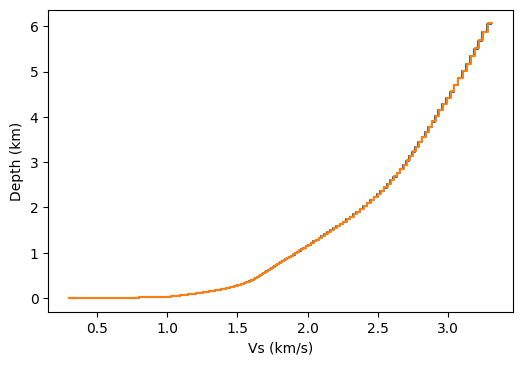

In [11]:
fig,ax = plt.subplots(dpi =100)

ax.step(cy14[' Vs (km/sec)'],cy14['z (km)'])
ax.step(velocity,depth)

ax.set(xlabel='Vs (km/s)',ylabel='Depth (km)')

In [12]:
import Inverse_QWL

In [16]:
df = Inverse_QWL.get_Vs(freqs,site_amp).vs_profile

[Text(0.5, 0, 'Vs (km/s)'), Text(0, 0.5, 'Depth (km)')]

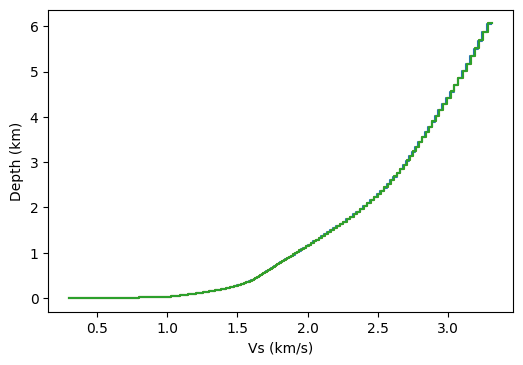

In [17]:
fig,ax = plt.subplots(dpi =100)

ax.step(cy14[' Vs (km/sec)'],cy14['z (km)'])
ax.step(velocity,depth)
ax.step(df['Vs (km/s)'],df['Depth (km)'])

ax.set(xlabel='Vs (km/s)',ylabel='Depth (km)')